In [11]:
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

from IPython import display

% matplotlib notebook
% matplotlib inline


In [12]:
# Q = Cin * m * deltaT
# P * dt
# m = ro * B^2 *h
# Q = P * dt


class Material:
    def __init__(self, name, density, specificHeat, thermalConductivity):
        self.name = name
        self.ro = density
        self.cw = specificHeat
        self.K = thermalConductivity


In [13]:
# Variable initiation

A = 0.1  # m
B = 0.02  # m
h = 0.002  # m

epochs = 999  # end defined by threshold 
threshold = 0.01

# type 1    
T0 = 20.0  # degrees
T1 = 100.0  # degrees
T2 = 10.0  # degrees

# type 2
# P=100W
# th = 10s
# B-edge is isolated

alumina = Material("alumina", 2700.0, 900.0, 237.0)
cooper = Material("cooper", 8920.0, 380.0, 401.0)
stainlessSteel = Material("stainless steel", 7860.0, 450.0, 58.0)

mat = alumina
# mat = cooper
# mat = stainlessSteel

method = 'eulerForward'
# method = 'centralDifference' 

dt = 0.005
dx = 0.005
dy = dx

SIZE_T = int(epochs / dt)
SIZE_X = int(A / dx)
SIZE_Y = int(A / dy)

plotEvery = 10

print("EPOCHS: " + str(SIZE_T) + " SIZE_X: " + str(SIZE_X) + " SIZE_Y: " + str(SIZE_Y))


EPOCHS: 99899999 SIZE_X: 50 SIZE_Y: 50


In [14]:
# Diagram methods 

def initPlot():
    fig = plt.figure(figsize=(12, 10))
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(gridX, gridY, matrix, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    
    # Customize axis.
    ax.set_zlim(0.0, 120.0)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    showAxis(ax)
    return fig, ax

def showAxis(ax):
    ax.set_xlabel('x coodinate (m)')
    ax.set_ylabel('y coodinate (m)')
    ax.set_zlabel('temperature ($^oC$)')
    ax.set_title('epoch: ' + str(epoch) + ', method: ' + method + ', material: ' + str(mat.name) + ', dt: ' + str(
        dt) + ', dx: ' + str(dx) + ', dy: ' + str(dy))

def plotMatrix(matrix):
    plt.cla()
    ax.plot_surface(gridX, gridY, matrix, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    showAxis(ax)
    display.clear_output(wait=True)
    display.display(plt.gcf())


In [1]:
# Computation methods

def setTempB(matrix, temp):
    matrix[int((A / 2 - B / 2) / dx):int((A / 2 + B / 2) / dx),
    int((A / 2 - B / 2) / dy):int((A / 2 + B / 2) / dy)] = temp

def initMatrix():
    matrix = np.zeros((SIZE_X, SIZE_Y))
    matrix[:, :] = T0
    border_size = 1
    if method == 'eulerForward':
        border_size = 1
    elif method == 'centralDifference':
        border_size = 2

    matrix[0:border_size, :] = T2
    matrix[SIZE_X - border_size:SIZE_X, :] = T2
    matrix[:, 0:border_size] = T2
    matrix[:, SIZE_Y - border_size:SIZE_Y] = T2
    setTempB(matrix, T1)
    print(matrix.astype(int))
    return matrix

def eulerForward(matrix, tmpMatrix):
    for i in range(1, SIZE_X - 1):
        for j in range(1, SIZE_Y - 1):
            Tn = matrix[i, j]
            xsd = (matrix[i + 1, j] - 2 * Tn + matrix[i - 1, j])
            ysd = (matrix[i, j + 1] - 2 * Tn + matrix[i, j - 1])
            Tn1 = Tn + (xParam / (dx * dx)) * xsd + (yParam / (dy * dy)) * ysd
            tmpMatrix[i, j] = Tn1
    setTempB(tmpMatrix, T1)
    matrix = tmpMatrix.copy()
    return matrix

# def centralDifference(matrix, tmpMatrix, m2):
#     for i in range(2,SIZE_X-2):
#         for j in range(2,SIZE_Y-2): 
#             Tn = matrix[i,j]
#             xsd = (-matrix[i-2,j] + 16*matrix[i-1,j] - 30*Tn + 16*matrix[i+1,j] - matrix[i+2,j])
#             ysd = (-matrix[i,j-2] + 16*matrix[i,j-1] - 30*Tn + 16*matrix[i,j+1] - matrix[i,j+2])
#             Tn1 = -3*m2[i,j]+4*Tn - 2*((xParam/(dx*dx*144)) * xsd + (yParam/(dy*dy*144)) * ysd)
# #             print(matrix.round(3))
# #             print(" i: "+str(i)+
# #                   " j: "+str(j)+
# #                   " matrix[i+1,j]: "+str(matrix[i+1,j])+
# #                   " matrix[i+2,j]: "+str(matrix[i+2,j])+
# #                   " matrix[i,j+1]: "+str(matrix[i,j+1])+
# #                   " matrix[i,j+2]: "+str(matrix[i,j+2])+
# #                   " Tn: "+str(Tn)+
# #                   " (xParam/(dx*dx)) "+str((xParam/(dx*dx)))+
# #                   " xsd "+str(xsd)+
# #                   " (yParam/(dy*dy)) "+str((yParam/(dy*dy)))+
# #                   " ysd "+str(ysd)+
# #                   " res "+str((xParam/(dx*dx)) * xsd + (yParam/(dy*dy)) * ysd)+
# #                   " =  "+str(Tn1))
#             tmpMatrix[i,j] = Tn1
#     setTempB(tmpMatrix,T1)      
#     matrix = tmpMatrix.copy()
#     return matrix



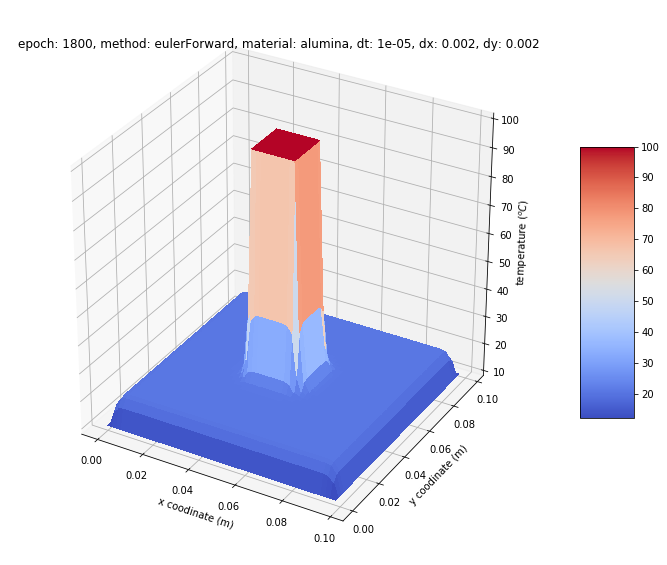

56516.64365523967 - 56516.64365523967 = 0.22981311311741592


KeyboardInterrupt: 

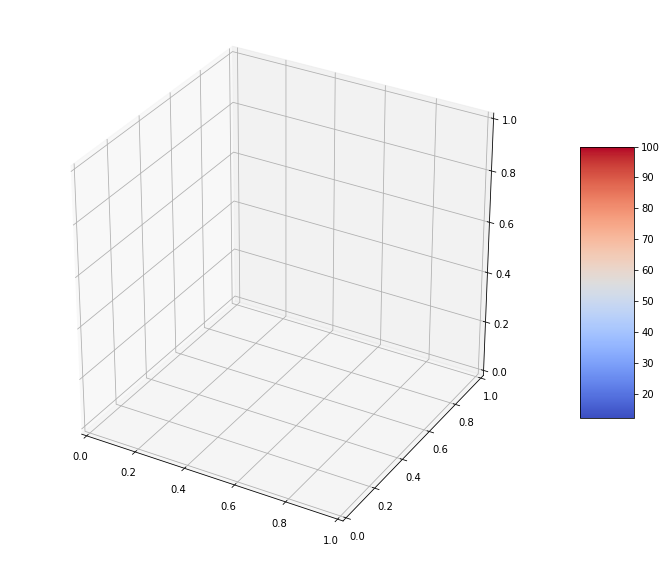

In [16]:
matrix = initMatrix()

xParam = (mat.K * dt) / (mat.cw * mat.ro)
yParam = (mat.K * dt) / (mat.cw * mat.ro)

epoch = 0
gridX, gridY = np.meshgrid(np.arange(0, A, dx), np.arange(0, A, dy))
fig, ax = initPlot()

change = threshold + 1

newS = 0
tmpMatrix = matrix.copy()

for epoch in range(SIZE_T + 1):
    oldS = matrix.sum()
    if epoch % plotEvery == 0:
        plotMatrix(matrix)
        print(str(oldS) + " - " + str(newS) + " = " + str(change))

        if threshold > change:
            break
    if method == 'eulerForward':
        matrix = eulerForward(matrix, tmpMatrix)
    # elif method == 'centralDifference':
    #     matrix = centralDifference(matrix, tmpMatrix)
    newS = matrix.sum()
    change = abs(oldS - newS)
